<a href="https://colab.research.google.com/github/anup-anny/EDA-on-Hotel-Booking/blob/main/EDA_on_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### '''Have you ever wondered when the best time of year to book a hotel room is?Or the optimal length of stay in order to get the best daily rate? 

### What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?This hotel booking dataset can help you explore those questions!

### This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies,and the number of available parking spaces, among other things. 

### All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.'''

### Importing libraries

In [167]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ast 
from datetime import datetime
import math



### Loading data set

In [168]:
df = pd.read_csv('/content/drive/MyDrive/Data science cohort Oslo (Almabetter)/EDA on hotel booking/Copy of Hotel Bookings.csv')

### Exploring the Data

In [144]:
# Shape of the Dataset

df.shape

(119390, 32)

In [145]:
# Information about dataset such as no.of columns, rows, data type, non-null values..so on & so forth.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [146]:
# checking first 5 rows

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [147]:
# checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [148]:
# stastical data of dataset

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [169]:
# Creating a copy of a dataset

df_new = df.copy()

In [150]:
# using loop we can find these unique values 
categorical_cols=list(set(df_new.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df_new.describe()))
for col in categorical_cols:
  print(col ,':', df_new[col].unique())

assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
reservation_status : ['Check-Out' 'Canceled' 'No-Show']
hotel : ['Resort Hotel' 'City Hotel']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']


In [170]:
# Also we can Find unique values in dataset using this code 
# df_new['column_name'].unique()
# but this method won't work on large no of columns

##Name of columns which contains unique data
1. hotel (Resort Hotel, city hotel)
2. is_canceled (0,1)
3. arrival_date_year (2015, 2016, 2017)
4. meal ('BB', 'FB', 'HB', 'SC', 'Undefined')
5. is_repeated_guest (0, 1)
6. deposit_type ('No Deposit', 'Refundable', 'Non Refund')
7. customer_type ('Transient', 'Contract', 'Transient-Party', 'Group')
8. required_car_parking_spaces (0, 1, 2, 8, 3)
9. total_of_special_requests (0, 1, 3, 2, 4, 5)
10. reservation_status ('Check-Out', 'Canceled', 'No-Show')

## Data cleaning 

In [152]:
# Finding duplicates True = duplicated value
df_new.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [171]:
# droping duplicates

df_new = df_new.drop_duplicates()

In [154]:
# Ensuring the column was dropped or not.

df_new.shape

(87396, 32)

In [155]:
# Finding null values

df_new.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [172]:
# Dealing with null-values 
# 1. filling null values with 0 in company and agent column 
df_new[['company','agent']] = df_new[['company','agent']].fillna(0)

# 2. filling null values with others in country 
df_new['country'] = df_new['country'].fillna('others')

# 3. filling null values with mean of childrens
df_new['children'].fillna(df_new['children'].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [157]:
# checking null value is replaced or not 

df_new.isnull().sum().sort_values(ascending = False) [:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [158]:
# Changing Datatype of some columns

df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'], format = '%Y-%m-%d')

df_new[['children', 'company', 'agent']] = df_new[['children', 'company', 'agent']].astype('int64')

In [159]:
# Droping 166 rows containing children , adult, and babies is equal to zero because it makes no sense.

len(df_new[df_new['adults'] +df_new['children'] +df_new ['babies'] == 0])

df_new.drop(df_new[df_new['adults'] +df_new['children'] +df_new ['babies'] == 0].index , inplace= True)

In [160]:
# Adding new column by combining some existing columns

df_new['total people']= df_new['adults'] +df_new['children'] +df_new ['babies']
df_new['total stayed'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']   

In [161]:
df_new.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total people,total stayed
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0


In [162]:
df_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total people,total stayed
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,...,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,...,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,2.029107,3.628534
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,...,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,0.790141,2.742948
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


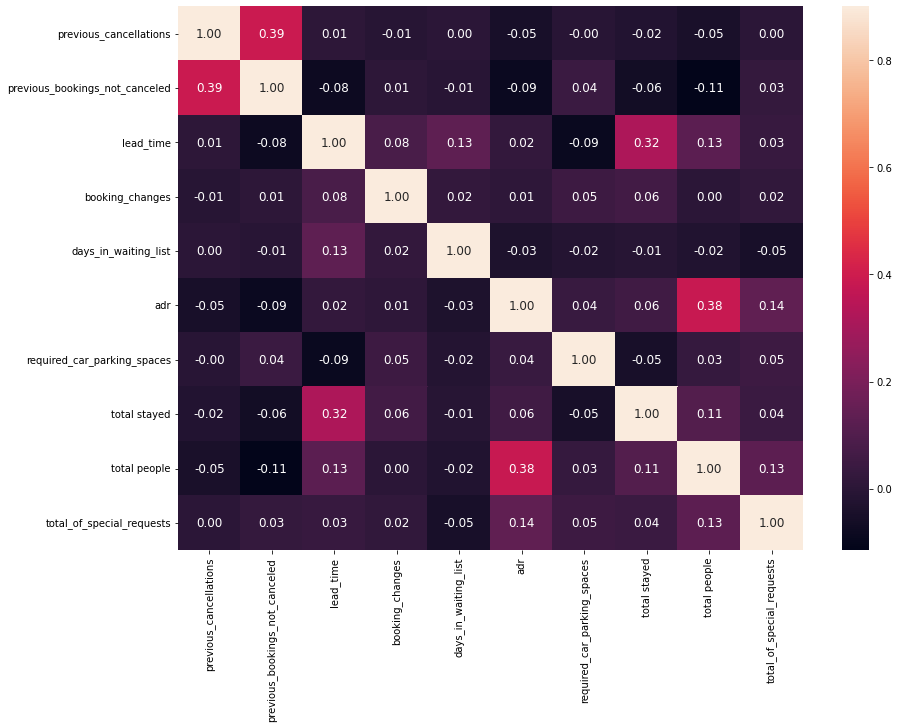

In [163]:
# Checking co-relation between meaningfull numeric values in data frame

numeric_values = df_new[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total stayed','total people','total_of_special_requests']]
co_relation_matrix = numeric_values.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',annot = True, annot_kws={'size': 12},  vmax = .9 )


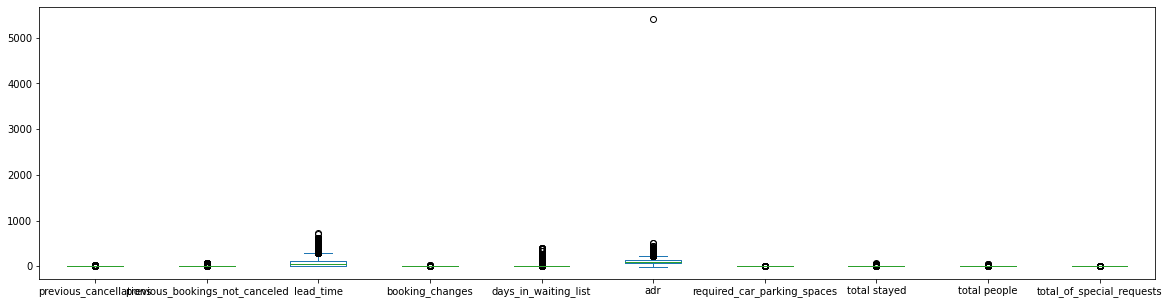

In [164]:
# identidying outliers
plt.rcParams['figure.figsize'] = (20, 5)
numeric_values.plot(kind = 'box')

Here we see in column adr the value is beyond normal range so it indicates that value is a outlier.

In [165]:
# Removing outliers

df_new.drop(df_new[df_new['adr'] > 5000].index, inplace = True) 

#EDA [Exploratory Data Analysis]

##1. Booking percentage of hotels

---



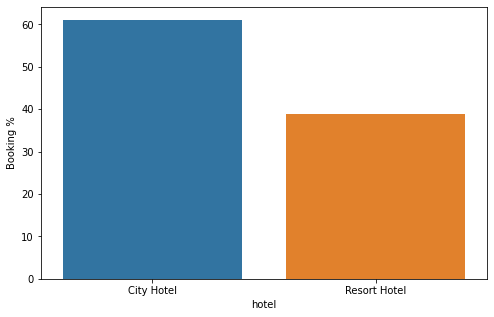

In [166]:
groupby_hotel = df_new.groupby('hotel')

d1 = (pd.DataFrame((groupby_hotel.size()/df_new.shape[0])*100)
        .reset_index().rename(columns = {0:'Booking %'}))

plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


Arround 60% people prefers City hotel and 40% people prefers Resort hotel.

##2. 